# Predict whether someone is a high / low risk credit card user.

In [51]:
# Import libs
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [52]:
# Load the Dataset
credit_clean = pd.read_csv('/Users/macbookair/Downloads/clean_data.csv')

# Context: 1 = High Risk, 0 = Low Risk

In [53]:
credit_clean.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [54]:
# Prep for Modeling
X = credit_clean.drop(['Target','ID', 'Phone', 'Email', 'Work_phone', 'Income_type', 'Education_type', 'Family_status', 'Housing_type','Occupation_type'], axis=1)
y = credit_clean['Target']

In [55]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
print(X_train.dtypes) # Error msg: could not convert many columns into int

Gender              int64
Own_car             int64
Own_property        int64
Unemployed          int64
Num_children        int64
Num_family          int64
Account_length      int64
Total_income      float64
Age               float64
Years_employed    float64
dtype: object


In [57]:
# Define and adjust model type
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

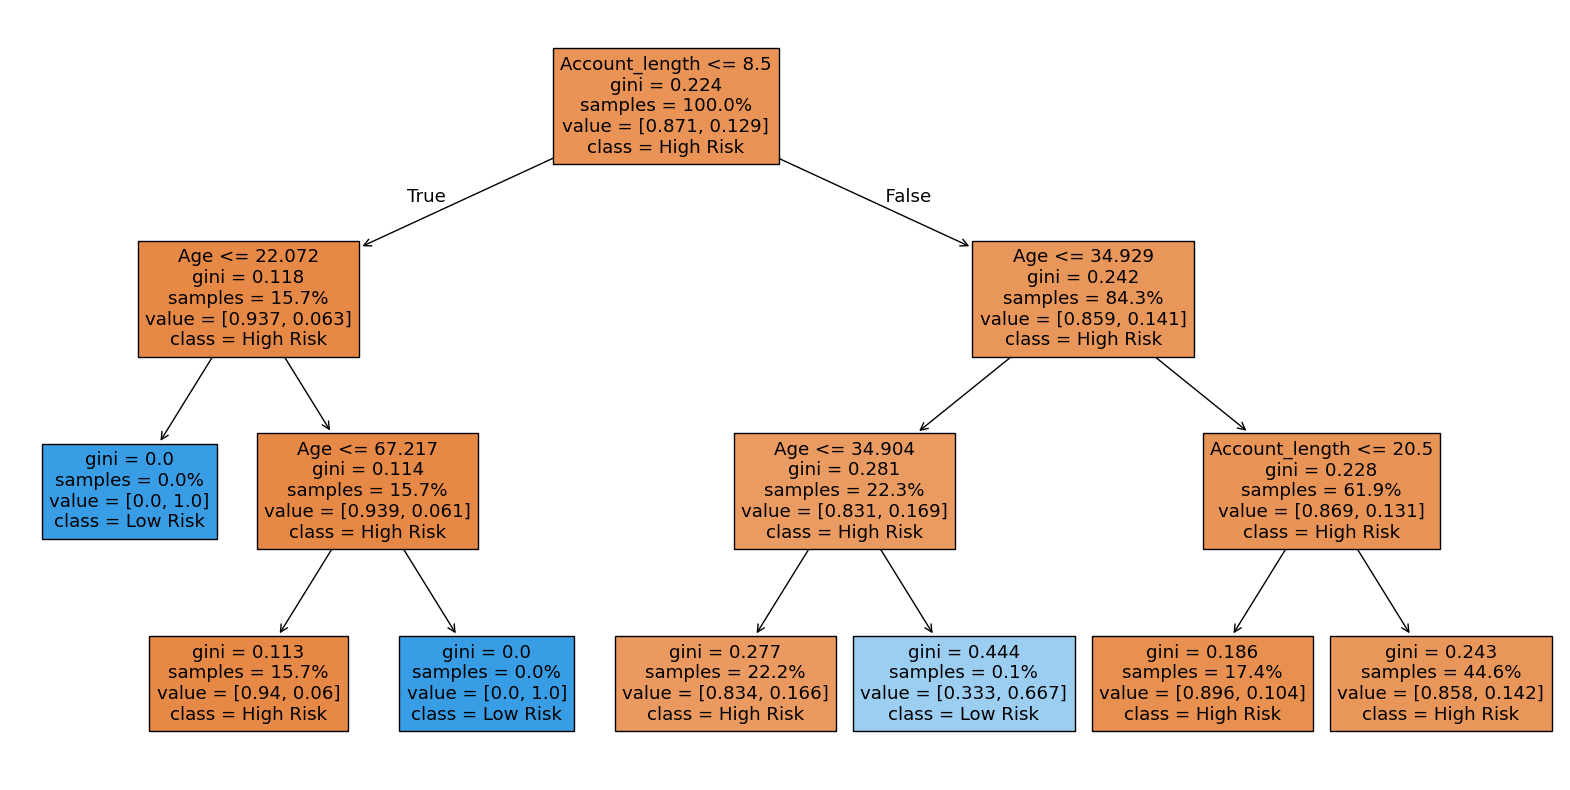

In [58]:
# Visualise
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=list(X_train.columns), class_names=['High Risk', 'Low Risk'], proportion=True)
plt.show()

In [59]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy (Genauigkeit) des Klassifikators bei den Testdaten: {accuracy:.2f}")

Accuracy (Genauigkeit) des Klassifikators bei den Testdaten: 0.85


# Klassifikationsmetriken

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [62]:
# Vorhersagen für den Testsatz treffen
y_pred = model.predict(X_test)

### Konfusionsmatrix und manuelle Berechnung

In [64]:
# Berechne die Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)

In [65]:
cm

array([[1656,    3],
       [ 283,    0]])

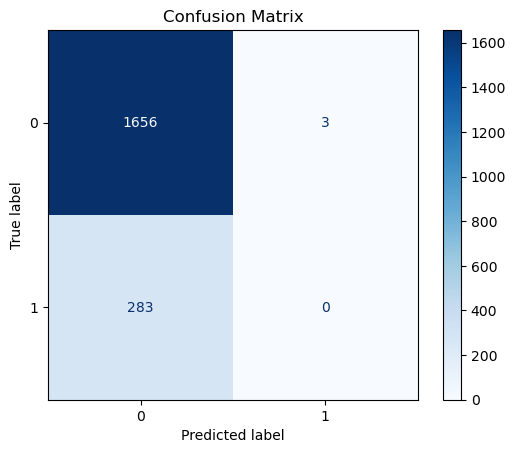

In [66]:
# Zeichne die Konfusionsmatrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [67]:
# Berechne die Genauigkeit manuell
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.85


In [68]:
# Berechne die Precision, den Recall und den F1-Wert.
precision = precision_score(y_test, y_pred, average='binary')  # for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Drucken der zusätzlichen Metriken
print(f"Precision on the test set: {precision:.2f}")
print(f"Recall on the test set: {recall:.2f}")
print(f"F1 Score on the test set: {f1:.2f}")

Precision on the test set: 0.00
Recall on the test set: 0.00
F1 Score on the test set: 0.00
